## EDA Datos Telecomunicaciones

In [1]:
import pandas as pd

In [23]:
#Creamos una funcion para evaluar tipo de datos, porcentaje de nulos y cantidad de valores unicos en el dataset
def resumen(df):
    print(f'data shape: {df.shape}')
    resumen = pd.DataFrame(df.dtypes, columns=['data type'])
    resumen['#missing'] = df.isnull().sum()
    resumen['%missing'] = df.isnull().sum()*100/len(df)
    resumen['#unique'] = df.nunique()
    return resumen

En primer lugar, cargamos datos de poblacion por provincia que obtuvimos de la pagina de Indec - Censo 2022 de Argentina

In [86]:
df_poblacion_por_provincia = pd.read_excel('Dataset/Poblacion_Argentina_Censo2022.xlsx')
print(df_poblacion_por_provincia)

              Provincia  Total_poblacion  Poblacion_viv_particulares  \
0                  CABA          3121707                     3095454   
1          BUENOS AIRES         17523996                    17408906   
2             CATAMARCA           429562                      427625   
3                 CHACO          1129606                     1124603   
4                CHUBUT           592621                      589454   
5               CORDOBA          3840905                     3812064   
6            CORRIENTES          1212696                     1209671   
7            ENTRE RIOS          1425578                     1415097   
8               FORMOSA           607419                      605507   
9                 JUJUY           811611                      809364   
10             LA PAMPA           361859                      359193   
11             LA RIOJA           383865                      382453   
12              MENDOZA          2043540                     203

A efectos de este analisis, tomaremos en cuenta solamente la poblacion en viviendas particulares y colectivas

In [88]:
df_poblacion_por_provincia['Total_pobl_en_viviendas']=df_poblacion_por_provincia['Poblacion_viv_particulares']+df_poblacion_por_provincia['Poblacion_viv_colectivas']
df_poblacion_por_provincia.head(24)


,Provincia,Total_poblacion,Poblacion_viv_particulares,Poblacion_viv_colectivas,Poblacion_situacion_calle,Total_pobl_en_viviendas
0,CABA,3121707,3095454,23850,2403,3119304
1,BUENOS AIRES,17523996,17408906,113664,1426,17522570
2,CATAMARCA,429562,427625,1909,28,429534
3,CHACO,1129606,1124603,4898,105,1129501
4,CHUBUT,592621,589454,3123,44,592577
5,CORDOBA,3840905,3812064,28705,136,3840769
6,CORRIENTES,1212696,1209671,2958,67,1212629
7,ENTRE RIOS,1425578,1415097,10315,166,1425412
8,FORMOSA,607419,605507,1912,0,607419
9,JUJUY,811611,809364,2165,82,811529


In [106]:
#Crearemos un subdataframe que contenga solo la provincia y el total poblacion con vivienda
df_poblacion_por_provincia_f=df_poblacion_por_provincia[['Provincia','Total_pobl_en_viviendas']]
df_poblacion_por_provincia_f.head()

,Provincia,Total_pobl_en_viviendas
0,CABA,3119304
1,BUENOS AIRES,17522570
2,CATAMARCA,429534
3,CHACO,1129501
4,CHUBUT,592577


Cargamos datos de Internet

In [117]:
# Cargamos algunas pestañas del archivo Internet y almacenamos cada hoja en un dataframe
archivo_excel = 'Dataset/Internet.xlsx'

df_media_bajada_evol = pd.read_excel(archivo_excel, sheet_name="Velocidad % por prov")

df_veloc_accesos_evol = pd.read_excel(archivo_excel, sheet_name="Velocidad_sin_Rangos")
df_tecnologias_acceso_evol = pd.read_excel(archivo_excel, sheet_name="Accesos Por Tecnología")

df_cobertura_pobl_evol = pd.read_excel(archivo_excel, sheet_name="Penetración-poblacion")
df_cobertura_hogar_evol = pd.read_excel(archivo_excel, sheet_name="Penetracion-hogares")

df_tecnologias_acceso_loc = pd.read_excel(archivo_excel, sheet_name="Accesos_tecnologia_localidad")
df_rango_vel_evol = pd.read_excel(archivo_excel, sheet_name="Accesos por rangos")
df_ingresos_evol= pd.read_excel(archivo_excel, sheet_name="Ingresos ")


Damos una mirada a los datos contenidos en cada dataframe

.df_tecnologias_acceso_prov

In [90]:
df_tecnologias_acceso_loc.head()

,Provincia,Partido,Localidad,Tecnologia,Link Indec,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,ADSL,6854100,755.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,CABLEMODEM,6854100,4600.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,FIBRA OPTICA,6854100,2.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,SATELITAL,6854100,742.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,WIRELESS,6854100,727.0


In [91]:
#Verificamos tipos de datos, missing y valores unicos
resumen(df_tecnologias_acceso_loc)

data shape: (7753, 6)


,data type,#missing,%missing,#unique
Provincia,object,0,0.000000,24
Partido,object,0,0.000000,435
Localidad,object,0,0.000000,2793
Tecnologia,object,0,0.000000,10
Link Indec,object,0,0.000000,2671
Accesos,float64,6,0.077389,1884


In [92]:
# Vemos los valores nulos de la columna Accesos
print(df_tecnologias_acceso_loc[df_tecnologias_acceso_loc['Accesos'].isnull()])

                Provincia     Partido         Localidad Tecnologia Link Indec  \
3755           CORRIENTES   Ituzaingó  Colonia Liebig's      Otros   18084010   
4101           ENTRE RIOS        Tala  Rosario del Tala      Otros   30091100   
5744                SALTA    Cafayate          Tolombón      Otros   66021020   
6005                SALTA  San Carlos           Animaná      Otros   66154020   
6010                SALTA  San Carlos        San Carlos      Otros   66154040   
7372  SANTIAGO DEL ESTERO       Choya             Frías      Otros   86063040   

      Accesos  
3755      NaN  
4101      NaN  
5744      NaN  
6005      NaN  
6010      NaN  
7372      NaN  


In [93]:
#Eliminamos estas filas ya que no nos sirve rellenar esos datos, no tenemos historico para inferir un numero a imputar
df_tecnologias_acceso_loc = df_tecnologias_acceso_loc.dropna(subset=['Accesos'])

In [97]:
# Trasponemos la tabla para poder cruzarla con las demas

# Creamos una tabla pivotada
df_tecnologias_acceso_loc_tr = df_tecnologias_acceso_loc.pivot_table(
    index=['Provincia', 'Localidad'],
    columns='Tecnologia',
    values='Accesos',
    aggfunc='sum',
    fill_value=0
)

# Reiniciamos el índice para aplanar la estructura
df_tecnologias_acceso_loc_tr.reset_index(inplace=True)

# Calcular la columna 'Total'
df_tecnologias_acceso_loc_tr['Total'] = df_tecnologias_acceso_loc_tr.sum(axis=1, numeric_only=True)

# Mostrar el resultado
df_tecnologias_acceso_loc_tr.head()

Tecnologia,Provincia,Localidad,ADSL,CABLEMODEM,Cablemodem,DIAL UP,FIBRA OPTICA,OTROS,Otros,SATELITAL,WIMAX,WIRELESS,Total
0,BUENOS AIRES,11 De Septiembre,6.0,1288.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,1299.0
1,BUENOS AIRES,12 de Octubre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,19.0
2,BUENOS AIRES,20 De Junio,4.0,744.0,0.0,2.0,1113.0,0.0,0.0,0.0,0.0,2.0,1865.0
3,BUENOS AIRES,25 de Mayo,755.0,4600.0,0.0,0.0,2.0,0.0,0.0,742.0,0.0,727.0,6826.0
4,BUENOS AIRES,30 de Agosto,0.0,184.0,0.0,0.0,1396.0,0.0,2376.0,0.0,0.0,0.0,3956.0


In [98]:
# Combinamos las columnas 'OTROS' y 'Otros' en una sola, igual que CABLEMODEM y Cablemodem 
df_tecnologias_acceso_loc_tr['OTROS'] = df_tecnologias_acceso_loc_tr['OTROS'] + df_tecnologias_acceso_loc_tr['Otros']
df_tecnologias_acceso_loc_tr['CABLEMODEM'] = df_tecnologias_acceso_loc_tr['CABLEMODEM'] + df_tecnologias_acceso_loc_tr['Cablemodem']

# Eliminar la columna redundante 'Otros' y 'Cablemodem'
df_tecnologias_acceso_loc_tr.drop(columns='Otros', inplace=True)
df_tecnologias_acceso_loc_tr.drop(columns='Cablemodem', inplace=True)

# Mostrar el resultado final
df_tecnologias_acceso_loc_tr.head()

Tecnologia,Provincia,Localidad,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total
0,BUENOS AIRES,11 De Septiembre,6.0,1288.0,0.0,4.0,1.0,0.0,0.0,0.0,1299.0
1,BUENOS AIRES,12 de Octubre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,19.0
2,BUENOS AIRES,20 De Junio,4.0,744.0,2.0,1113.0,0.0,0.0,0.0,2.0,1865.0
3,BUENOS AIRES,25 de Mayo,755.0,4600.0,0.0,2.0,0.0,742.0,0.0,727.0,6826.0
4,BUENOS AIRES,30 de Agosto,0.0,184.0,0.0,1396.0,2376.0,0.0,0.0,0.0,3956.0


In [100]:
#Ahora crearemos un nuevo dataframe con los datos resumidos por provincia
df_tecnologias_acceso_prov = df_tecnologias_acceso_loc_tr.groupby('Provincia').sum(numeric_only=True).reset_index()
df_tecnologias_acceso_prov.head()

Tecnologia,Provincia,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total
0,BUENOS AIRES,214055.0,2722466.0,5900.0,1849476.0,56102.0,1061.0,1682.0,138638.0,4989380.0
1,CABA,54102.0,1144781.0,2050.0,230402.0,27704.0,67.0,0.0,4493.0,1463599.0
2,CATAMARCA,4951.0,10303.0,1.0,58355.0,1.0,79.0,0.0,1384.0,75074.0
3,CHACO,9448.0,57935.0,5.0,68944.0,2277.0,76.0,0.0,8407.0,147092.0
4,CHUBUT,25955.0,80704.0,857.0,26516.0,8906.0,167.0,0.0,31118.0,174223.0


Para la verificacion de outliers, cruzaremos el df con el de poblacion por provincia

In [ ]:
print(f'Shape antes del cruce',df_tecnologias_acceso_prov.shape)
df_tecnologias_acceso_prov_f = pd.merge(df_tecnologias_acceso_prov, df_poblacion_por_provincia_f, on='Provincia', how='left')
print(f'Shape antes del cruce',df_tecnologias_acceso_prov_f.shape)
df_tecnologias_acceso_prov_f.head()

Shape antes del cruce (24, 10)
Shape antes del cruce (24, 11)


,Provincia,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total,Total_pobl_en_viviendas
0,BUENOS AIRES,214055.0,2722466.0,5900.0,1849476.0,56102.0,1061.0,1682.0,138638.0,4989380.0,17522570
1,CABA,54102.0,1144781.0,2050.0,230402.0,27704.0,67.0,0.0,4493.0,1463599.0,3119304
2,CATAMARCA,4951.0,10303.0,1.0,58355.0,1.0,79.0,0.0,1384.0,75074.0,429534
3,CHACO,9448.0,57935.0,5.0,68944.0,2277.0,76.0,0.0,8407.0,147092.0,1129501
4,CHUBUT,25955.0,80704.0,857.0,26516.0,8906.0,167.0,0.0,31118.0,174223.0,592577


In [110]:
#Crearemos columnas de porcentaje de accesos por poblacion de provincia

# Lista de las columnas para las que quieres calcular el porcentaje
columnas = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS', 'Total']

# Crear nuevas columnas con el porcentaje
for col in columnas:
    df_tecnologias_acceso_prov_f[f'{col}_porc'] = (df_tecnologias_acceso_prov_f[col] / df_tecnologias_acceso_prov_f['Total_pobl_en_viviendas']) * 100

df_tecnologias_acceso_prov_f.head()

,Provincia,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total,Total_pobl_en_viviendas,ADSL_porc,CABLEMODEM_porc,DIAL UP_porc,FIBRA OPTICA_porc,OTROS_porc,SATELITAL_porc,WIMAX_porc,WIRELESS_porc,Total_porc
0,BUENOS AIRES,214055.0,2722466.0,5900.0,1849476.0,56102.0,1061.0,1682.0,138638.0,4989380.0,17522570,1.221596,15.536910,0.033671,10.554822,0.320170,0.006055,0.009599,0.791197,28.474020
1,CABA,54102.0,1144781.0,2050.0,230402.0,27704.0,67.0,0.0,4493.0,1463599.0,3119304,1.734425,36.699886,0.065720,7.386327,0.888147,0.002148,0.000000,0.144039,46.920691
2,CATAMARCA,4951.0,10303.0,1.0,58355.0,1.0,79.0,0.0,1384.0,75074.0,429534,1.152644,2.398646,0.000233,13.585653,0.000233,0.018392,0.000000,0.322210,17.478011
3,CHACO,9448.0,57935.0,5.0,68944.0,2277.0,76.0,0.0,8407.0,147092.0,1129501,0.836476,5.129256,0.000443,6.103934,0.201593,0.006729,0.000000,0.744311,13.022742
4,CHUBUT,25955.0,80704.0,857.0,26516.0,8906.0,167.0,0.0,31118.0,174223.0,592577,4.380021,13.619158,0.144623,4.474693,1.502927,0.028182,0.000000,5.251301,29.400905


La forma en que identificaremos outliers o posibles errores será fijandonos en los porcentajes mayores a 120 (fijado para referencia) en el total de accesos

In [111]:
print(df_tecnologias_acceso_prov_f[df_tecnologias_acceso_prov_f['Total_porc']>120])

Empty DataFrame
Columns: [Provincia, ADSL, CABLEMODEM, DIAL UP, FIBRA OPTICA, OTROS, SATELITAL, WIMAX, WIRELESS, Total, Total_pobl_en_viviendas, ADSL_porc, CABLEMODEM_porc, DIAL UP_porc, FIBRA OPTICA_porc, OTROS_porc, SATELITAL_porc, WIMAX_porc, WIRELESS_porc, Total_porc]
Index: []


Probaremos bajando el % a 100

In [112]:
print(df_tecnologias_acceso_prov_f[df_tecnologias_acceso_prov_f['Total_porc']>100])

Empty DataFrame
Columns: [Provincia, ADSL, CABLEMODEM, DIAL UP, FIBRA OPTICA, OTROS, SATELITAL, WIMAX, WIRELESS, Total, Total_pobl_en_viviendas, ADSL_porc, CABLEMODEM_porc, DIAL UP_porc, FIBRA OPTICA_porc, OTROS_porc, SATELITAL_porc, WIMAX_porc, WIRELESS_porc, Total_porc]
Index: []


No tenemos casos por lo que asumiremos que los datos de acceso estan OK

.df_tecnologias_acceso_evol


In [30]:
df_tecnologias_acceso_evol.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0


In [118]:
#Verificamos tipos de datos, missing y valores unicos
resumen(df_tecnologias_acceso_evol)

data shape: (1009, 9)


,data type,#missing,%missing,#unique
Año,object,1,0.099108,13
Trimestre,object,1,0.099108,8
Provincia,object,2,0.198216,24
ADSL,float64,2,0.198216,896
Cablemodem,float64,2,0.198216,889
Fibra óptica,float64,2,0.198216,753
Wireless,float64,2,0.198216,715
Otros,float64,2,0.198216,671
Total,float64,2,0.198216,998


In [120]:
# Vemos los valores nulos en la columna 'Total'
print(df_tecnologias_acceso_evol[df_tecnologias_acceso_evol['Total'].isnull()])


      Año                                          Trimestre Provincia  ADSL  \
1007  NaN                                                NaN       NaN   NaN   
1008    *  Los datos provinciales no coinciden a nivel na...       NaN   NaN   

      Cablemodem  Fibra óptica  Wireless  Otros  Total  
1007         NaN           NaN       NaN    NaN    NaN  
1008         NaN           NaN       NaN    NaN    NaN  


In [121]:
#Eliminamos esta fila ya que no aporta datos
df_tecnologias_acceso_evol = df_tecnologias_acceso_evol.dropna(subset=['Total'])

In [122]:
#Verificamos nuevamente tipos de datos, missing y valores unicos
resumen(df_tecnologias_acceso_evol)

data shape: (1007, 9)


,data type,#missing,%missing,#unique
Año,object,0,0.0,12
Trimestre,object,0,0.0,7
Provincia,object,0,0.0,24
ADSL,float64,0,0.0,896
Cablemodem,float64,0,0.0,889
Fibra óptica,float64,0,0.0,753
Wireless,float64,0,0.0,715
Otros,float64,0,0.0,671
Total,float64,0,0.0,998


Para identificar outliers lo haremos de la misma manera que con el dataset anterior

In [127]:
#Primero, crearemos una funcion para quitar acentos y convertir en mayuscula los valores de una columna

import unicodedata

# Función para eliminar acentos y convertir a mayúsculas
def quitar_acentos_y_mayuscula(texto):
    if isinstance(texto, str):  # Verifica que el valor sea una cadena de texto
        texto_normalizado = unicodedata.normalize('NFKD', texto)
        texto_sin_acento = ''.join([c for c in texto_normalizado if not unicodedata.combining(c)])
        return texto_sin_acento.upper()
    return texto

In [128]:
#cruzamos con los datos de poblacion por provincia

#antes, capitalizamos los valores de Provincia y quitamos acentos para poder cruzar con exito 
df_tecnologias_acceso_evol['Provincia']=df_tecnologias_acceso_evol['Provincia'].apply(quitar_acentos_y_mayuscula)

# Actualizar el valor de la columna 'Provincia' cuando sea 'Capital Federal'
df_tecnologias_acceso_evol.loc[df_tecnologias_acceso_evol['Provincia'] == 'CAPITAL FEDERAL', 'Provincia'] = 'CABA'


print(f'Shape antes del cruce',df_tecnologias_acceso_evol.shape)
df_tecnologias_acceso_evol_f = pd.merge(df_tecnologias_acceso_evol, df_poblacion_por_provincia_f, on='Provincia', how='left')
print(f'Shape antes del cruce',df_tecnologias_acceso_evol_f.shape)
df_tecnologias_acceso_evol_f.head()

Shape antes del cruce (1007, 9)
Shape antes del cruce (1007, 10)


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Total_pobl_en_viviendas
0,2024,2,BUENOS AIRES,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0,17522570
1,2024,2,CABA,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0,3119304
2,2024,2,CATAMARCA,4951.0,10303.0,58355.0,1384.0,81.0,75074.0,429534
3,2024,2,CHACO,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0,1129501
4,2024,2,CHUBUT,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0,592577


In [ ]:
#Verificamos si todos cruzaron
print(df_tecnologias_acceso_evol_f[df_tecnologias_acceso_evol_f['Total_pobl_en_viviendas'].isna()])

Empty DataFrame
Columns: [Año, Trimestre, Provincia, ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total, Total_pobl_en_viviendas]
Index: []


In [130]:
#Crearemos columnas de porcentaje de accesos por poblacion de provincia y trimestre

# Lista de las columnas para las que quieres calcular el porcentaje
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Otros', 'Wireless', 'Total']

# Crear nuevas columnas con el porcentaje
for col in columnas:
    df_tecnologias_acceso_evol_f[f'{col}_porc'] = (df_tecnologias_acceso_evol_f[col] / df_tecnologias_acceso_evol_f['Total_pobl_en_viviendas']) * 100

df_tecnologias_acceso_evol_f.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Total_pobl_en_viviendas,ADSL_porc,Cablemodem_porc,Fibra óptica_porc,Otros_porc,Wireless_porc,Total_porc
0,2024,2,BUENOS AIRES,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0,17522570,1.221596,15.536910,10.554822,0.369495,0.791197,28.474020
1,2024,2,CABA,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0,3119304,1.734425,36.699886,7.386327,0.956015,0.144039,46.920691
2,2024,2,CATAMARCA,4951.0,10303.0,58355.0,1384.0,81.0,75074.0,429534,1.152644,2.398646,13.585653,0.018858,0.322210,17.478011
3,2024,2,CHACO,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0,1129501,0.836476,5.129256,6.103934,0.208765,0.744311,13.022742
4,2024,2,CHUBUT,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0,592577,4.380021,13.619158,4.474693,1.675732,5.251301,29.400905


In [131]:
print(df_tecnologias_acceso_evol_f[df_tecnologias_acceso_evol_f['Total_porc']>100])

Empty DataFrame
Columns: [Año, Trimestre, Provincia, ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total, Total_pobl_en_viviendas, ADSL_porc, Cablemodem_porc, Fibra óptica_porc, Otros_porc, Wireless_porc, Total_porc]
Index: []


No tenemos casos por lo que asumiremos que los datos de acceso estan OK

.df_media_bajada_evol

In [8]:
df_media_bajada_evol.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,2,Buenos Aires,157.41
1,2024,2,Capital Federal,233.01
2,2024,2,Catamarca,97.38
3,2024,2,Chaco,107.76
4,2024,2,Chubut,21.67


In [ ]:
#Verificamos tipos de datos, missing y valores unicos
resumen(df_media_bajada_evol)

data shape: (1008, 4)


,data type,#missing,%missing,#unique
Año,int64,0,0.0,11
Trimestre,int64,0,0.0,4
Provincia,object,0,0.0,24
Mbps (Media de bajada),float64,0,0.0,1002


No tenemos missings por lo que pasaremos a verificar outliers

In [148]:
#Acotaremos nuestro df solamente a datos de los ultimos 5 años
df_media_bajada_evol_u5a = df_media_bajada_evol[df_media_bajada_evol['Año'] >= 2020]

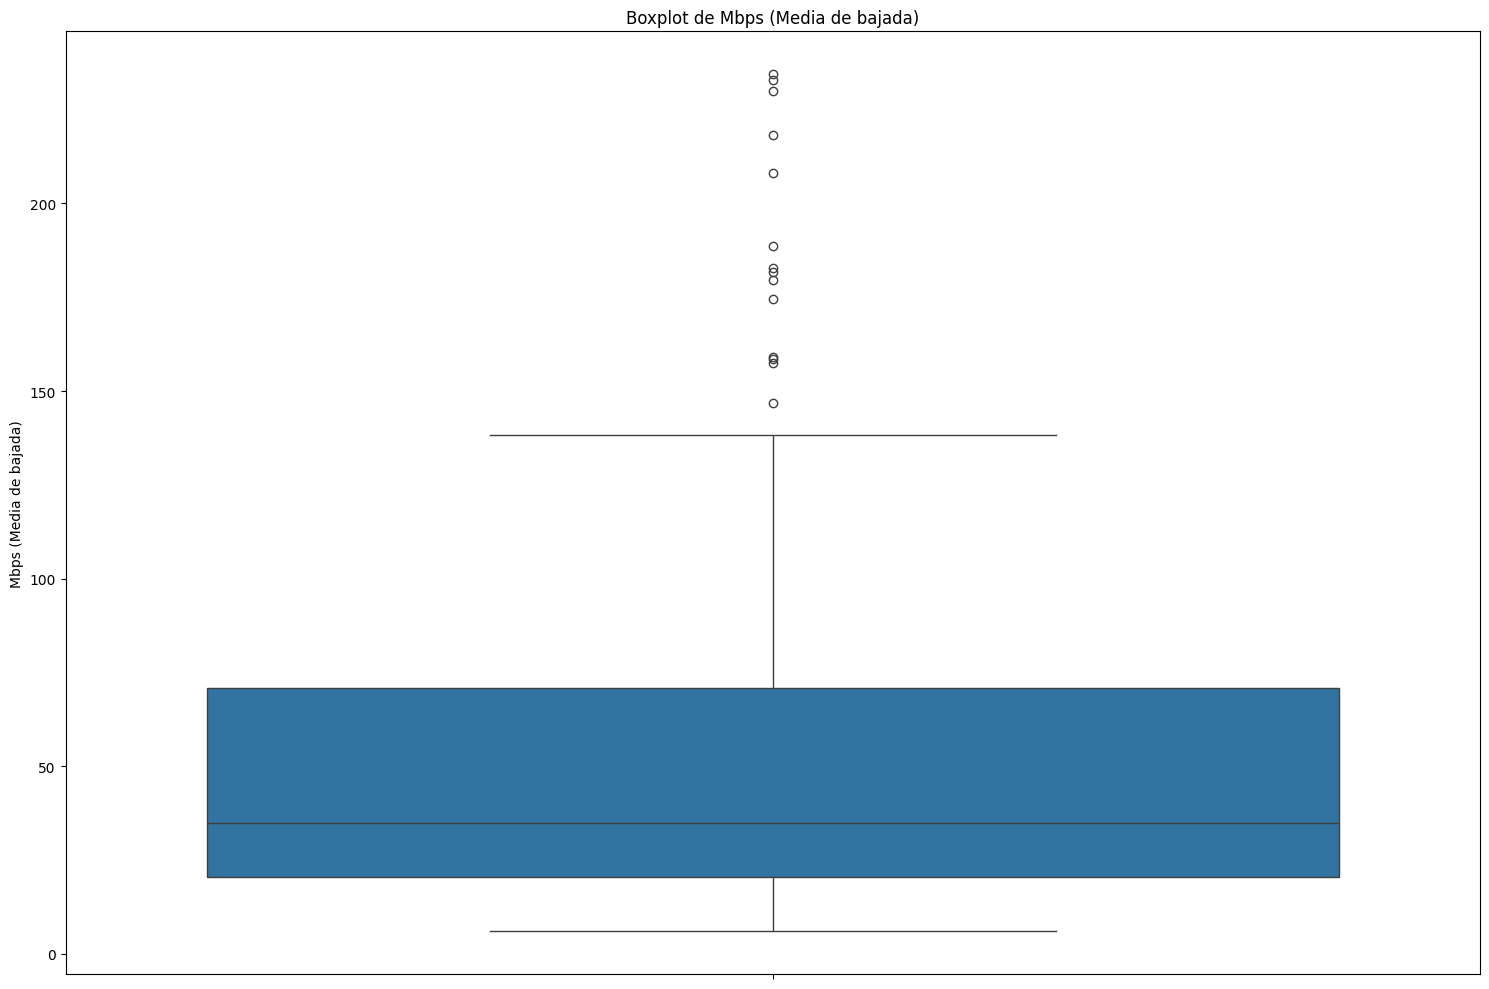

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos un boxplot para la columna 
plt.figure(figsize=(15, 10))

#plt.subplot(2, 3, i)
sns.boxplot(y=df_media_bajada_evol_u5a['Mbps (Media de bajada)'])
plt.title(f"Boxplot de Mbps (Media de bajada)")
plt.tight_layout()
plt.show()

Con este gráfico podemos observar que la mayoría de las provincias tienen velocidades de bajada en un rango más bajo, pero existen algunas provincias con velocidades mucho mayores que se destacan como outliers. 

Esto podría indicar disparidades en la infraestructura de Internet entre diferentes regiones o condiciones excepcionales en algunos lugares.

Para identificar esto último, seguiremos graficando las velocidades 

In [150]:
# Detectaremos cuales son las provincias con outliers, usando el rango intercuartílico (IQR)
outliers = {}
prov_outliers_aux={}

Q1 = df_media_bajada_evol_u5a['Mbps (Media de bajada)'].quantile(0.25)
Q3 = df_media_bajada_evol_u5a['Mbps (Media de bajada)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
prov_outliers_aux['Provincia'] = df_media_bajada_evol_u5a[(df_media_bajada_evol_u5a['Mbps (Media de bajada)'] < lower_bound) | (df_media_bajada_evol_u5a['Mbps (Media de bajada)'] > upper_bound)]['Provincia'].drop_duplicates()

# Mostramos el número de outliers por columna
for column, values in prov_outliers_aux.items():
    print(f"Provincias con outliers: {values}")

Provincias con outliers: 0        Buenos Aires
1     Capital Federal
18           San Luis
Name: Provincia, dtype: object


In [152]:
prov_con_outliers = ['Buenos Aires', 'Capital Federal',  'San Luis']

In [ ]:
#Separamos el dataset en provincias con y sin outliers
df_media_bajada_u5a_prov_con_out=df_media_bajada_evol_u5a[df_media_bajada_evol_u5a['Provincia'].isin(prov_con_outliers)]
df_media_bajada_u5a_prov_sin_out=df_media_bajada_evol_u5a[~df_media_bajada_evol_u5a['Provincia'].isin(prov_con_outliers)]

Ahora graficamos los distintos grupos

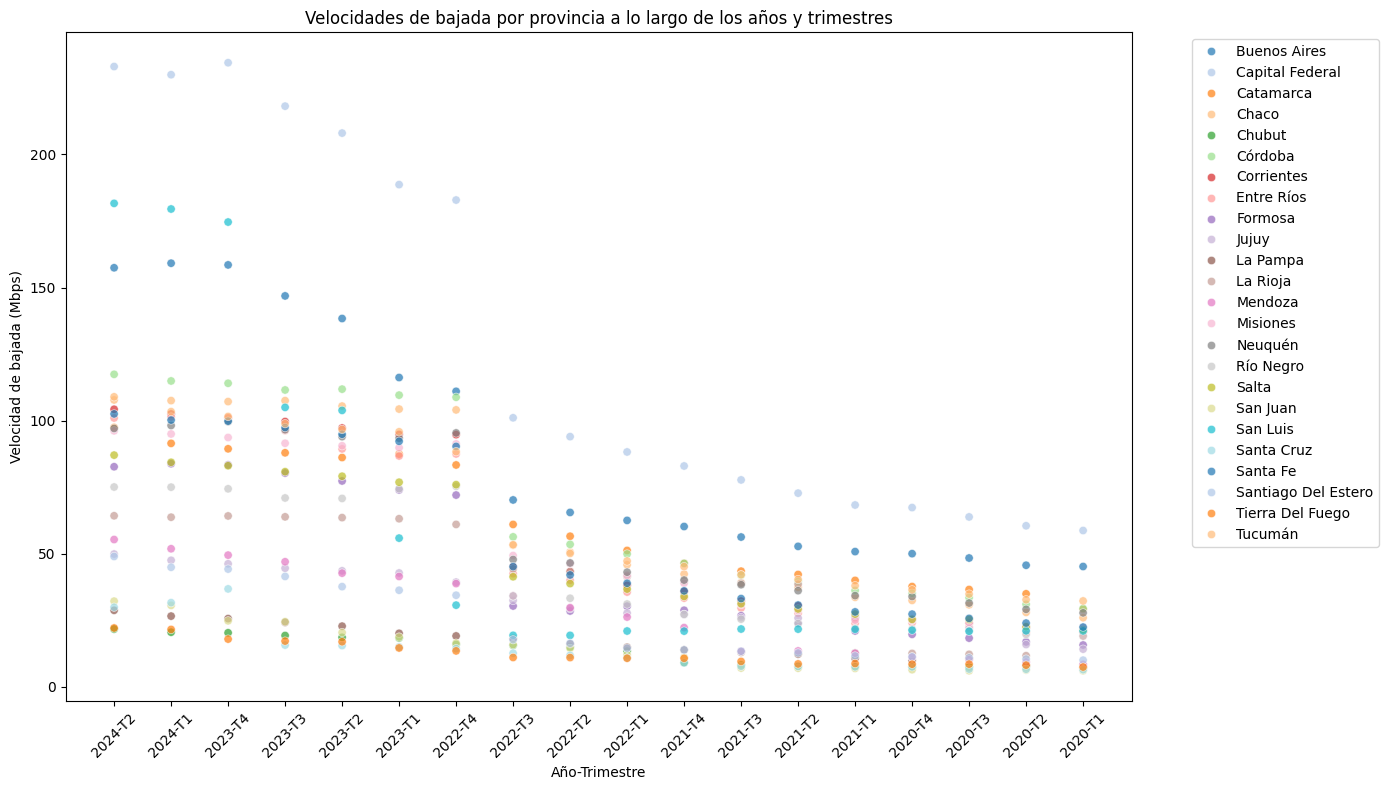

In [139]:
# Creamos un scatter plot utilizando seaborn
plt.figure(figsize=(14, 8))

sns.scatterplot(
    data=df_media_bajada_evol_u5a,
    x=df_media_bajada_evol_u5a['Año'].astype(str) + '-T' + df_media_bajada_evol_u5a['Trimestre'].astype(str),  # Concatenamos 'Año' y 'Trimestre' para el eje X
    y='Mbps (Media de bajada)',
    hue='Provincia',  # Coloreamos los puntos por localidad
    palette='tab20',  # Elegimos una paleta de colores
    alpha=0.7  # Transparencia de los puntos
)

plt.title('Velocidades de bajada por provincia a lo largo de los años y trimestres')
plt.xlabel('Año-Trimestre')
plt.ylabel('Velocidad de bajada (Mbps)')
plt.xticks(rotation=45)  # Rotamos los ticks del eje X para mejor legibilidad
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Colocamos la leyenda fuera del gráfico
plt.tight_layout()
plt.show()

.df_veloc_accesos_evol

In [6]:
df_veloc_accesos_evol.head()

,Año,Trimestre,Provincia,Velocidad,Accesos
0,2024,2,BUENOS AIRES,75.0,1062
1,2024,2,BUENOS AIRES,59.0,59
2,2024,2,BUENOS AIRES,480.0,5
3,2024,2,BUENOS AIRES,3.5,41735
4,2024,2,BUENOS AIRES,18.0,1042


In [ ]:
#Verificamos tipos de datos, missing y valores unicos
resumen(df_veloc_accesos_evol)

data shape: (18884, 5)


,data type,#missing,%missing,#unique
Año,int64,0,0.000000,8
Trimestre,int64,0,0.000000,4
Provincia,object,0,0.000000,48
Velocidad,float64,10,0.052955,190
Accesos,int64,0,0.000000,7010


In [57]:
# Vemos los valores nulos en la columna 'Velocidad'
print(df_veloc_accesos_evol[df_veloc_accesos_evol['Velocidad'].isnull()])

        Año  Trimestre     Provincia  Velocidad  Accesos
1155   2024          1       Córdoba        NaN        1
1644   2024          1      Santa Fe        NaN        9
3753   2023          2       Córdoba        NaN        1
4239   2023          2      Santa Fe        NaN        9
6303   2022          3       Córdoba        NaN        1
6785   2022          3      Santa Fe        NaN        9
9255   2021          3  Buenos Aires        NaN        4
10031  2021          2  Buenos Aires        NaN        4
10794  2021          1  Buenos Aires        NaN        4
11538  2020          4  Buenos Aires        NaN        4


In [58]:
#Eliminamos estas filas ya que la cantidad de accesos es infima como para intentar identificar la velocidad al que hace referencia
df_veloc_accesos_evol = df_veloc_accesos_evol.dropna(subset=['Velocidad'])

.df_cobertura_pobl_evol

In [12]:
df_cobertura_pobl_evol.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,2,Buenos Aires,27.43
1,2024,2,Capital Federal,47.44
2,2024,2,Catamarca,17.50
3,2024,2,Chaco,11.78
4,2024,2,Chubut,26.46


In [ ]:
#Verificamos tipos de datos, missings y valores unicos
resumen(df_cobertura_pobl_evol)

data shape: (1000, 4)


,data type,#missing,%missing,#unique
Año,int64,0,0.0,11
Trimestre,int64,0,0.0,4
Provincia,object,0,0.0,24
Accesos por cada 100 hab,float64,0,0.0,990


.df_cobertura_hogar_evol

In [13]:
df_cobertura_hogar_evol.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.84
1,2024,2,Capital Federal,116.37
2,2024,2,Catamarca,68.81
3,2024,2,Chaco,44.06
4,2024,2,Chubut,86.33


In [ ]:
#Verificamos tipos de datos, missings y valores unicos
resumen(df_cobertura_hogar_evol)

data shape: (1000, 4)


,data type,#missing,%missing,#unique
Año,int64,0,0.0,11
Trimestre,int64,0,0.0,4
Provincia,object,0,0.0,24
Accesos por cada 100 hogares,float64,0,0.0,993


Cargamos datos de Conectividad

In [62]:
# Cargamos algunas pestañas del archivo Mapa de Conectividad y almacenamos en un dataframe
archivo_excel = 'Dataset/mapa_conectividad.xlsx'
df_conectividad = pd.read_excel(archivo_excel)

In [7]:
df_conectividad.tail()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
4300,SANTA FE,San Justo,Silva (Est. Abipones),360,--,--,--,--,--,SI,--,--,--,82112150.0,-30.448640,-60.430070
4301,SANTA FE,San Justo,Vera y Pintado (Est. Guaraníes),997,SI,SI,--,SI,--,SI,SI,--,SI,82112160.0,-30.143643,-60.337353
4302,SANTA FE,San Justo,Videla,2027,SI,--,--,SI,--,SI,SI,--,SI,82112170.0,-30.946503,-60.656441
4303,SANTA FE,San Lorenzo,Aldao,587,--,SI,--,--,--,--,SI,--,--,82119010.0,-32.706985,-60.817952
4304,SANTA FE,San Lorenzo,Capitán Bermúdez,29218,SI,SI,--,SI,--,--,SI,SI,SI,82119020.0,-32.828235,-60.716821


In [63]:
#Verificamos tipos de datos, missings y valores unicos
resumen(df_conectividad)

data shape: (4305, 16)


,data type,#missing,%missing,#unique
Provincia,object,0,0.000000,24
Partido,object,0,0.000000,445
Localidad,object,0,0.000000,3911
Población,int64,0,0.000000,2395
ADSL,object,0,0.000000,2
Cablemódem,object,0,0.000000,2
Dial Up,object,0,0.000000,2
Fibra óptica,object,0,0.000000,2
Satelital,object,0,0.000000,2
Wireless,object,0,0.000000,2


In [ ]:
#El dato Link no estaremos utilizando por lo que no eliminaremos esas filas